In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from category_encoders.target_encoder import TargetEncoder
from xgboost import XGBClassifier, XGBRegressor, plot_importance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.metrics import mean_squared_error, r2_score
os.chdir('C:/Users/louka/Desktop/Machine Learning course/Project/Machine-learning-project')
print(os.getcwd())

C:\Users\louka\Desktop\Machine Learning course\Project\Machine-learning-project


In [2]:
def process_percentage_column(column):
    return column.str.rstrip('%').astype(float) / 100

In [3]:
#We will get the 2012,2016,2020 datasets
df_2012=pd.read_csv('Data/Features_2012.csv')
df_2016=pd.read_csv('Data/Features_2016.csv')
df_2021=pd.read_csv('Data/Features_2021.csv')

df_target_2012=pd.read_csv('Data/2012 Election Results.csv')
df_target_2016=pd.read_csv('Data/2016 Presidential Election Results by State.csv')
df_target_2020=pd.read_csv('Data/2020 elections made.csv')

df_test_2023=pd.read_csv('Data/Features_2023.csv')

df_target_2012.drop([51],axis=0,inplace=True)
df_target_2012[['Percentage Democrat', 'Percentage Republican', 'Percentage Other']] = df_target_2012[['Percentage Democrat', 'Percentage Republican', 'Percentage Other']].apply(pd.to_numeric, errors='coerce')
df_target_2012[['Percentage Democrat', 'Percentage Republican', 'Percentage Other']]=df_target_2012[['Percentage Democrat', 'Percentage Republican', 'Percentage Other']].div(100) #fixed

#print(df_target_2012) #nice
df_target_2020[['Percentage Democrat', 'Percentage Republican', 'Percentage Other']]=df_target_2020[['Percentage Democrat', 'Percentage Republican', 'Percentage Other']].apply(process_percentage_column)

#Merge feature data
df_train=pd.concat([df_2012,df_2016,df_2021],ignore_index=True)
# print(df_train)

# #Merge target data
df_target=pd.concat([df_target_2012,df_target_2016,df_target_2020],ignore_index=True)
#print(df_target)
#Make indices nice etc
df_train.set_index("NAME",inplace=True) #nice
df_target.set_index("STATE",inplace=True)
df_test_2023.set_index("NAME",inplace=True)
#print(df_train)

#Fixes:
#GRAPI is wrong for anything other than 2012. RIP
df_train.drop(df_train.columns[df_train.columns.str.contains('GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME')], axis=1, inplace=True)
df_test_2023.drop(df_test_2023.columns[df_test_2023.columns.str.contains('GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME')], axis=1, inplace=True)

#df_train

In [4]:
#XGBoost Regression
X=df_train
y=df_target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)
estimators = [
    ("imputation_mean", SimpleImputer(missing_values=np.nan, strategy="mean")),
    ("scaler", StandardScaler()),
    ('clf', XGBRegressor(random_state=8))
]
pipe=Pipeline(steps=estimators)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(df_test_2023)
print(y_pred)
#test_r2=r2_score(y,y_pred)
# print(test_r2)
df_results=pd.DataFrame(y_pred)
df_results.to_csv(f'Data\Results_2023.csv', index=True)

[[0.3743298  0.58052945 0.03836443]
 [0.39247748 0.5300566  0.04339309]
 [0.51902586 0.4355908  0.03772557]
 [0.39179045 0.5637133  0.03731529]
 [0.6546774  0.29105216 0.03596279]
 [0.5042735  0.39189276 0.03750478]
 [0.5796125  0.39290798 0.04194616]
 [0.5237591  0.37847286 0.03736698]
 [0.78405476 0.06769337 0.03674998]
 [0.5020563  0.43539864 0.0366193 ]
 [0.49549797 0.40663767 0.03742824]
 [0.6461086  0.2972873  0.03717332]
 [0.3578605  0.5077965  0.04148975]
 [0.58859617 0.40390128 0.03652459]
 [0.43445987 0.44463697 0.03596126]
 [0.46184215 0.4401934  0.03422032]
 [0.37209854 0.5278568  0.04016501]
 [0.4440545  0.4781175  0.04313305]
 [0.42888045 0.45057875 0.04308501]
 [0.4342084  0.40975422 0.04332659]
 [0.67913336 0.34698153 0.04227941]
 [0.5888449  0.38760495 0.04630915]
 [0.502799   0.43916595 0.03627715]
 [0.50083256 0.41943723 0.03873556]
 [0.37756544 0.59536517 0.04173687]
 [0.36529326 0.44695652 0.0381314 ]
 [0.38032228 0.545015   0.03685782]
 [0.47002873 0.39716625 0.04

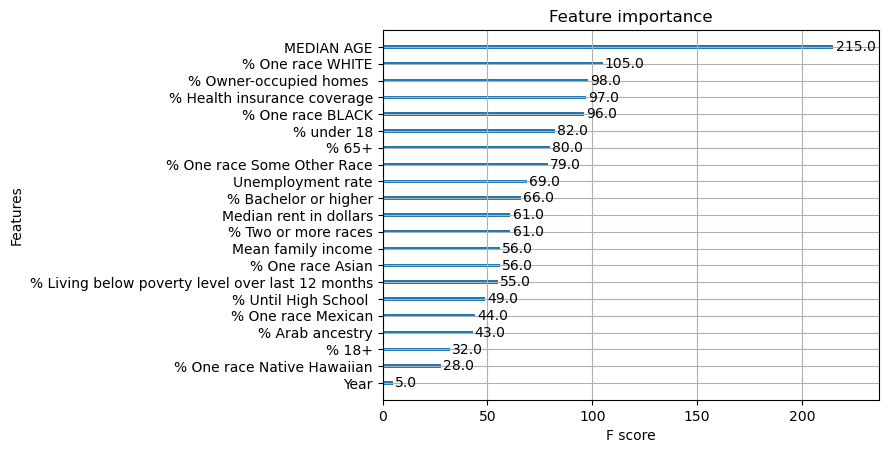

In [5]:
pipe[2].feature_importances_
feature_names = df_train.columns.tolist()
pipe[2].get_booster().feature_names = feature_names
plot_importance(pipe[2])
plt.show()


############################

SECOND TEST

DROP MEDIAN AGE

############################

In [7]:
df_train_2=df_train.drop(columns=['MEDIAN AGE','% under 18'])
df_test_2023_2=df_test_2023.drop(columns=['MEDIAN AGE','% under 18'])
#XGBoost Regression
X=df_train_2
y=df_target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)
estimators = [
    ("imputation_mean", SimpleImputer(missing_values=np.nan, strategy="mean")),
    ("scaler", StandardScaler()),
    ('clf', XGBRegressor(random_state=8))
]
pipe=Pipeline(steps=estimators)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(df_test_2023_2)
print(y_pred)
#test_r2=r2_score(y,y_pred)
# print(test_r2)
df_results=pd.DataFrame(y_pred)
df_results.to_csv(f'Data\Results_2023.csv', index=True)

[[0.35561347 0.52536523 0.03747688]
 [0.44149646 0.5072176  0.04470256]
 [0.5194873  0.39653075 0.03764605]
 [0.42129034 0.5614701  0.03696776]
 [0.68545103 0.30002278 0.03599238]
 [0.52138484 0.43474886 0.03747562]
 [0.5669024  0.37708816 0.04445959]
 [0.52820784 0.41101328 0.03900811]
 [0.6993986  0.0546669  0.03723391]
 [0.5222099  0.41971767 0.0363421 ]
 [0.51354945 0.4020183  0.03822803]
 [0.6679715  0.29585055 0.0382077 ]
 [0.33836976 0.5281995  0.04232201]
 [0.57255536 0.4228231  0.03717743]
 [0.49477148 0.45060155 0.03572316]
 [0.4050715  0.47077456 0.03407154]
 [0.41289407 0.55002207 0.04040797]
 [0.42412788 0.5096597  0.04200108]
 [0.43079674 0.47172537 0.04256264]
 [0.45582703 0.41884816 0.04298849]
 [0.6758244  0.30498636 0.04259223]
 [0.58177626 0.38565883 0.04678516]
 [0.4855834  0.5232743  0.03598187]
 [0.49610618 0.4333602  0.03858641]
 [0.37238562 0.5738233  0.04190226]
 [0.4098472  0.4666298  0.03727056]
 [0.40186438 0.53256875 0.03699995]
 [0.4964287  0.43041855 0.04

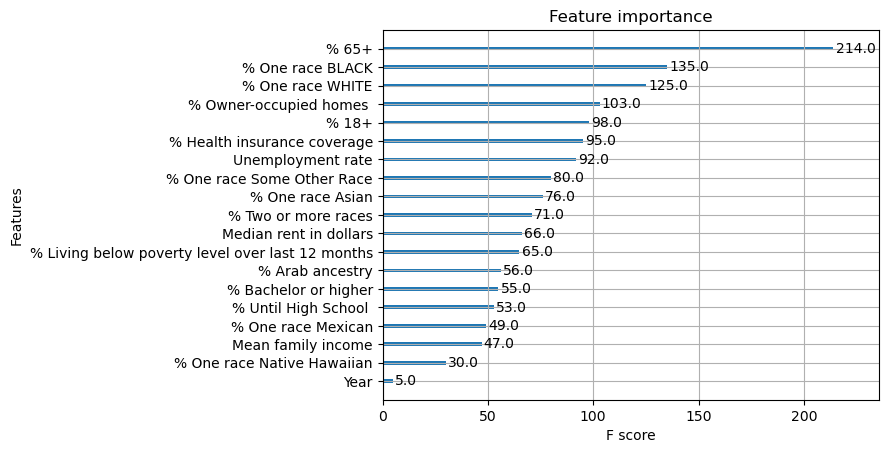

In [8]:
pipe[2].feature_importances_
feature_names = df_train_2.columns.tolist()
pipe[2].get_booster().feature_names = feature_names
plot_importance(pipe[2])
plt.show()


####################

3RD TEST

SHUFFLE  COLUMNS

####################


In [10]:
def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df

In [19]:
df_train_3= swap_columns(df_train,'MEDIAN AGE','% Bachelor or higher')
#df_train_3=df_train_3.drop(columns='MEDIAN AGE')
df_test_2023_3= swap_columns(df_test_2023,'MEDIAN AGE','% Bachelor or higher')
# df_test_2023_3=df_test_2023_3.drop(columns='MEDIAN AGE')

# df_train_3= swap_columns(df_train,'MEDIAN AGE','% Bachelor or higher')
# df_test_2023_3= swap_columns(df_test_2023,'MEDIAN AGE','% Bachelor or higher')


#XGBoost Regression
X=df_train_3
y=df_target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)
estimators = [
    ("imputation_mean", SimpleImputer(missing_values=np.nan, strategy="mean")),
    ("scaler", StandardScaler()),
    ('clf', XGBRegressor(random_state=8))
]
pipe=Pipeline(steps=estimators)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(df_test_2023_3)
print(y_pred)
#test_r2=r2_score(y,y_pred)
# print(test_r2)
df_results=pd.DataFrame(y_pred)
df_results.to_csv(f'Data\Results_2023_swapped.csv', index=True)

[[0.3743298  0.5812355  0.03836443]
 [0.39247748 0.5300566  0.0440508 ]
 [0.51902586 0.5104412  0.03772557]
 [0.39179045 0.56441927 0.03731529]
 [0.6448515  0.09840113 0.03596278]
 [0.5042735  0.38946494 0.03690351]
 [0.5799153  0.39195287 0.04194616]
 [0.5227391  0.36740544 0.03736698]
 [0.8924606  0.0557867  0.03782749]
 [0.5020563  0.5097904  0.0366193 ]
 [0.49585253 0.48102954 0.03742824]
 [0.6459571  0.09587727 0.03717332]
 [0.36507678 0.5077965  0.04148975]
 [0.58757615 0.40249562 0.03652459]
 [0.43445987 0.440698   0.03596126]
 [0.46184215 0.44745886 0.03422032]
 [0.37209854 0.52739835 0.04016501]
 [0.4440545  0.48020652 0.04313305]
 [0.4196912  0.453688   0.04308501]
 [0.43760663 0.4157822  0.04332659]
 [0.67913336 0.33896625 0.04274813]
 [0.5888449  0.38665783 0.04630915]
 [0.502799   0.43961507 0.03627715]
 [0.50215536 0.4180316  0.03873556]
 [0.3778024  0.59607124 0.04173687]
 [0.36529326 0.4549277  0.0381314 ]
 [0.38753858 0.54553795 0.03685782]
 [0.4704407  0.39670774 0.04

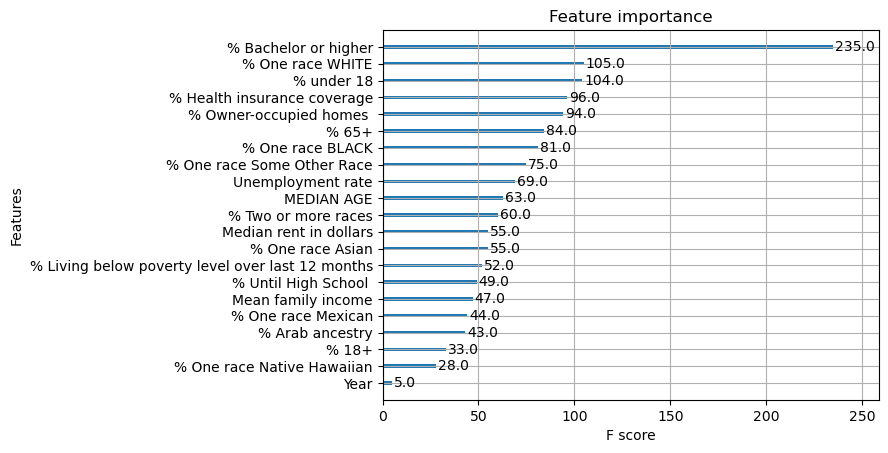

In [21]:
pipe[2].feature_importances_
feature_names = df_train_3.columns.tolist()
pipe[2].get_booster().feature_names = feature_names
plot_importance(pipe[2])
plt.show()


########

BAYES SEARCH CV WAY (EXPERIMENTAL DANGER TOO MUCH SWAG)

########

In [24]:
#We will get the 2012,2016,2020 datasets
df_2012=pd.read_csv('Data/Features_2012.csv')
df_2016=pd.read_csv('Data/Features_2016.csv')
df_2021=pd.read_csv('Data/Features_2021.csv')

df_target_2012=pd.read_csv('Data/2012 Election Results.csv')
df_target_2016=pd.read_csv('Data/2016 Presidential Election Results by State.csv')
df_target_2020=pd.read_csv('Data/2020 elections made.csv')

df_test_2023=pd.read_csv('Data/Features_2023.csv')

df_target_2012.drop([51],axis=0,inplace=True)
df_target_2012[['Percentage Democrat', 'Percentage Republican', 'Percentage Other']] = df_target_2012[['Percentage Democrat', 'Percentage Republican', 'Percentage Other']].apply(pd.to_numeric, errors='coerce')
df_target_2012[['Percentage Democrat', 'Percentage Republican', 'Percentage Other']]=df_target_2012[['Percentage Democrat', 'Percentage Republican', 'Percentage Other']].div(100) #fixed
df_target_2012['Percentage Other'] = df_target_2012['Percentage Other'] + 1e-8
#print(df_target_2012) #nice
df_target_2020[['Percentage Democrat', 'Percentage Republican', 'Percentage Other']]=df_target_2020[['Percentage Democrat', 'Percentage Republican', 'Percentage Other']].apply(process_percentage_column)

#Merge feature data
df_train=pd.concat([df_2012,df_2016,df_2021],ignore_index=True)
# print(df_train)

# #Merge target data
df_target=pd.concat([df_target_2012,df_target_2016,df_target_2020],ignore_index=True)
print(df_target)
#Make indices nice etc
df_train.set_index("NAME",inplace=True) #nice
df_target.set_index("STATE",inplace=True)
df_test_2023.set_index("NAME",inplace=True)
#print(df_train)

#Fixes:
#GRAPI is wrong for anything other than 2012. RIP
df_train.drop(df_train.columns[df_train.columns.str.contains('GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME')], axis=1, inplace=True)
df_test_2023.drop(df_test_2023.columns[df_test_2023.columns.str.contains('GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME')], axis=1, inplace=True)

#df_train

             STATE  Percentage Democrat  Percentage Republican  \
0          Alabama               0.3840                 0.6050   
1           Alaska               0.4080                 0.5480   
2          Arizona               0.4460                 0.5370   
3         Arkansas               0.3690                 0.6060   
4       California               0.6020                 0.3710   
..             ...                  ...                    ...   
148       Virginia               0.5411                 0.4400   
149     Washington               0.5797                 0.3877   
150  West Virginia               0.2970                 0.6863   
151      Wisconsin               0.4945                 0.4882   
152        Wyoming               0.2655                 0.6994   

     Percentage Other  
0        1.000000e-08  
1        1.000000e-08  
2        1.000000e-08  
3        1.000000e-08  
4        1.000000e-08  
..                ...  
148      1.890000e-02  
149      3.2600

In [26]:
df_target_Bayes=df_target.apply(np.log)
df_target_Bayes

X=df_train
y=df_target_Bayes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)
estimators = [
    ("imputation_mean", SimpleImputer(missing_values=np.nan, strategy="mean")),
    ("scaler", StandardScaler()),
    ('clf', XGBRegressor(random_state=8))
]
pipe=Pipeline(steps=estimators)

In [28]:
search_space = {
    'clf__max_depth': Integer(2,4),
    'clf__learning_rate': Real(0.1, 1.0, prior='log-uniform'),
    'clf__colsample_bylevel': Real(0.5, 1.0),
    'clf__colsample_bynode' : Real(0.5, 1.0),
}
                                       #cv: number of folds
opt = BayesSearchCV(pipe, search_space, cv=10, n_iter=5, scoring='r2', random_state=8) 
# in reality, you may consider setting cv and n_iter to higher values

In [36]:
df_results_2023_Bayes

,0,1,2
0,-0.572414,-0.886977,-18.262241
1,-0.537071,-1.102148,-3.485707
2,-0.685414,-0.886579,-3.831512
3,-0.589438,-0.850944,-18.440594
4,-0.522644,-0.831504,-3.834217
5,-1.051944,-0.581097,-3.664468
6,-0.922261,-0.549376,-3.394695
7,-0.739496,-0.790261,-3.043150
8,-0.796611,-0.837016,-3.895642
9,-0.515637,-0.927724,-3.780922


In [34]:
opt.fit(X_train, y_train)
best_model = opt.best_estimator_
y_pred = best_model.predict(X_test)
print(np.exp(y_pred))
test_r2 = r2_score(y_test, y_pred)
# Output results
print("Best hyperparameters:", opt.best_params_)
print("R^2 score on the test set:", test_r2)

[[5.6416190e-01 4.1189891e-01 1.1716809e-08]
 [5.8445764e-01 3.3215678e-01 3.0632101e-02]
 [5.0388157e-01 4.1206285e-01 2.1676818e-02]
 [5.5463880e-01 4.2701179e-01 9.8028394e-09]
 [5.9295046e-01 4.3539381e-01 2.1618268e-02]
 [3.4925830e-01 5.5928445e-01 2.5617789e-02]
 [3.9761910e-01 5.7730967e-01 3.3550791e-02]
 [4.7735453e-01 4.5372635e-01 4.7684450e-02]
 [4.5085421e-01 4.3300074e-01 2.0330327e-02]
 [5.9712034e-01 3.9545262e-01 2.2801660e-02]
 [5.9161526e-01 4.2368251e-01 1.1440435e-08]
 [6.7383730e-01 3.8108620e-01 1.3701534e-02]
 [4.7401002e-01 4.5006371e-01 3.3164617e-02]
 [3.9723158e-01 5.8027893e-01 2.7784545e-02]
 [4.8706308e-01 4.5290363e-01 1.0578029e-08]
 [4.4325092e-01 5.2570957e-01 2.6853964e-02]
 [3.5564604e-01 5.3406036e-01 5.0631616e-02]
 [5.7884943e-01 4.3874770e-01 1.5887586e-02]
 [5.3091520e-01 4.2499882e-01 3.5652824e-02]
 [4.5548409e-01 3.9832962e-01 4.0514592e-02]
 [3.4506807e-01 6.0546172e-01 1.0686319e-08]
 [3.8904300e-01 6.0100549e-01 9.8936983e-09]
 [4.098197

In [40]:
#df_test_2023.apply(np.log)
y_res=best_model.predict(df_test_2023)
y_res=np.exp(y_res)
print(y_res)
df_results_2023_Bayes=pd.DataFrame(y_res)

df_results_2023_Bayes.to_csv(f'Data\Results_2023_Bayes.csv', index=True)


ValueError: Input X contains infinity or a value too large for dtype('float64').

In [ ]:
xgboost_step = opt.best_estimator_.steps[2]
xgboost_model = xgboost_step[1]
#Print feature names correctly
feature_names = df_train.columns.tolist()
print(feature_names)
xgboost_model.get_booster().feature_names = feature_names
print (xgboost_model)
plot_importance(xgboost_model)